In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [5]:
df = pd.read_csv('./customers_dataset.csv')

df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Quick overview of our data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.select_dtypes(include="object").describe()

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Clean columns' names from any spaces

In [9]:
df.columns = df.columns.str.replace(" ",  "_").str.replace(".", "")

In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

## Correlation HeatMap & Charts

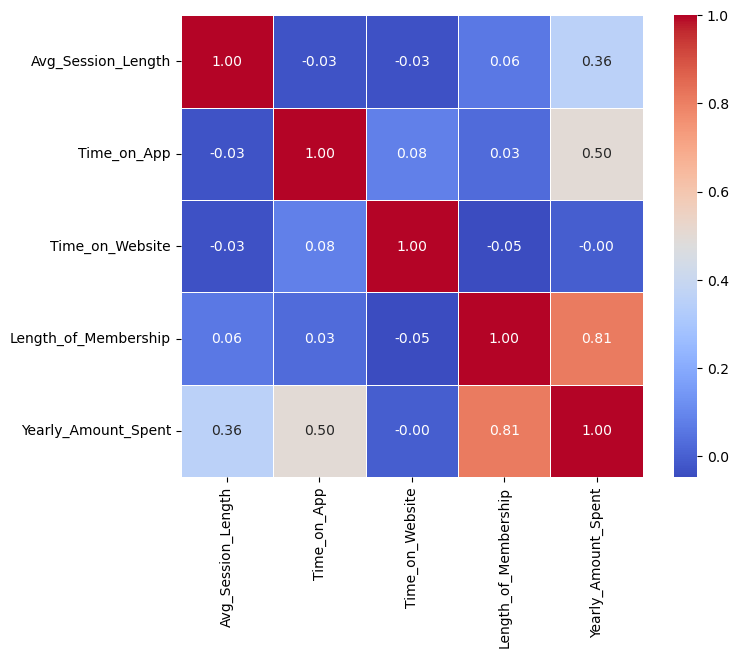

In [15]:
corr = df.corr(numeric_only=True)


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.show()

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

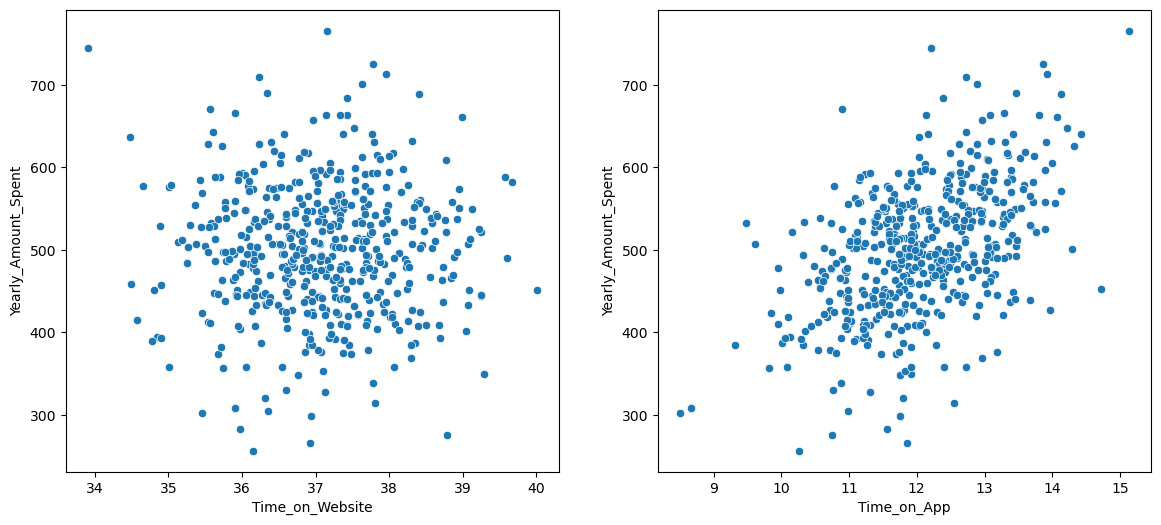

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.scatterplot(data=df, x="Time_on_Website", y="Yearly_Amount_Spent", ax=ax1)
sns.scatterplot(data=df, x="Time_on_App", y="Yearly_Amount_Spent", ax=ax2)

plt.show()

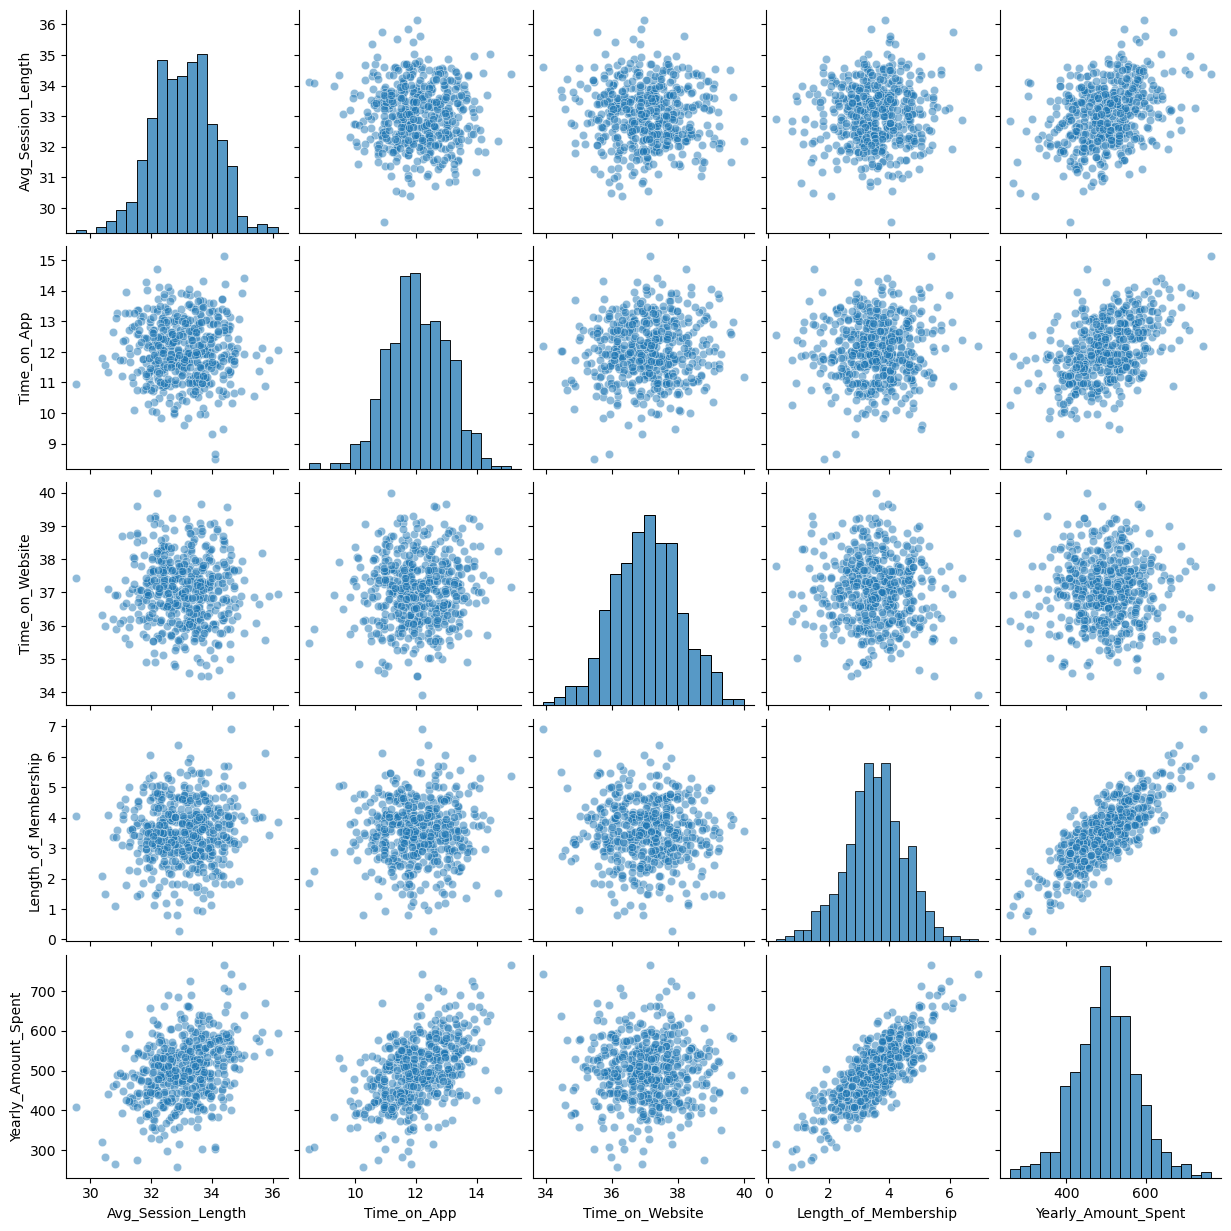

In [32]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.5})

plt.show()

## Feature Selection

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership']]
y = df["Yearly_Amount_Spent"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
249,33.780157,11.917636,36.844734,3.634996
433,34.278248,11.822722,36.308545,2.117383
19,32.617856,13.989593,37.190504,4.064549
322,33.264632,10.732131,36.145792,4.086566
332,33.144234,11.737041,37.935189,2.190132


## Training The Model

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("coefficients:", model.coef_)
print("interception:", model.intercept_)

predictions = model.predict(X_test)
print("Predicted Yearly_Amount_Spent:", predictions[:10])

coefficients: [25.5962591  38.78534598  0.31038593 61.89682859]
interception: -1044.2574146365575
Predicted Yearly_Amount_Spent: [402.86230051 542.53325708 426.62011918 501.91386363 409.6666551
 569.92155038 531.50423529 505.94309188 408.10378607 473.45942928]


## Difference between Predicted and Actual Values

In [93]:
actual_vs_predicted = {
    "Actual_Yearly_Spent": y_test,
    "Predicted_Yearly_Spent": predictions
}

actual_vs_predicted_df = pd.DataFrame(actual_vs_predicted)
actual_vs_predicted_df["Difference"] = np.abs(round(actual_vs_predicted_df["Predicted_Yearly_Spent"] - actual_vs_predicted_df["Actual_Yearly_Spent"], 2))

actual_vs_predicted_df.sort_values(by="Difference", ascending=False).head()

,Actual_Yearly_Spent,Predicted_Yearly_Spent,Difference
148,424.185494,393.955933,30.23
472,469.383146,499.506960,30.12
82,596.430173,619.465550,23.04
75,478.719357,455.930701,22.79
278,530.362469,510.339492,20.02


## Vusialization

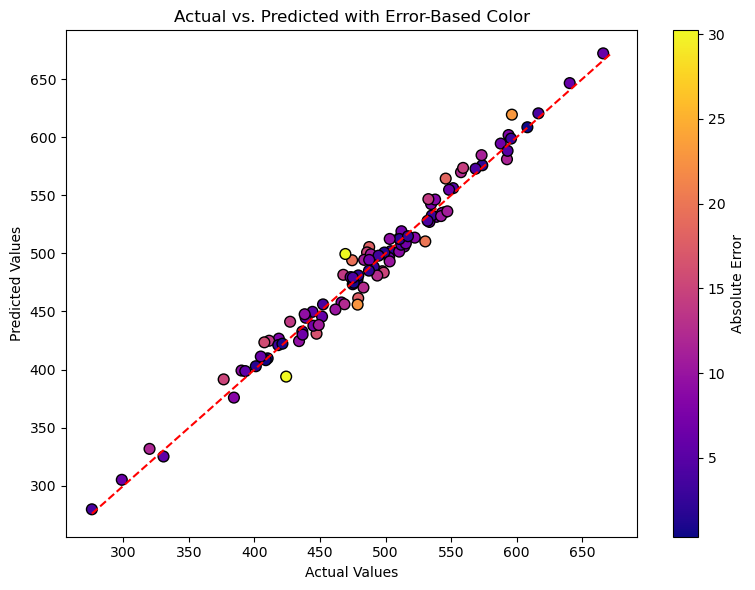

In [76]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    actual_vs_predicted_df["Actual_Yearly_Spent"], 
    actual_vs_predicted_df["Predicted_Yearly_Spent"],
    c=actual_vs_predicted_df["Difference"], 
    cmap="plasma", 
    s=60, 
    edgecolor="k"
)

# Add diagonal line (perfect prediction line)
min_val = min(actual_vs_predicted_df["Actual_Yearly_Spent"].min(), actual_vs_predicted_df["Predicted_Yearly_Spent"].min())
max_val = max(actual_vs_predicted_df["Actual_Yearly_Spent"].max(), actual_vs_predicted_df["Predicted_Yearly_Spent"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted with Error-Based Color")
plt.colorbar(scatter, label="Absolute Error")
plt.tight_layout()
plt.show()

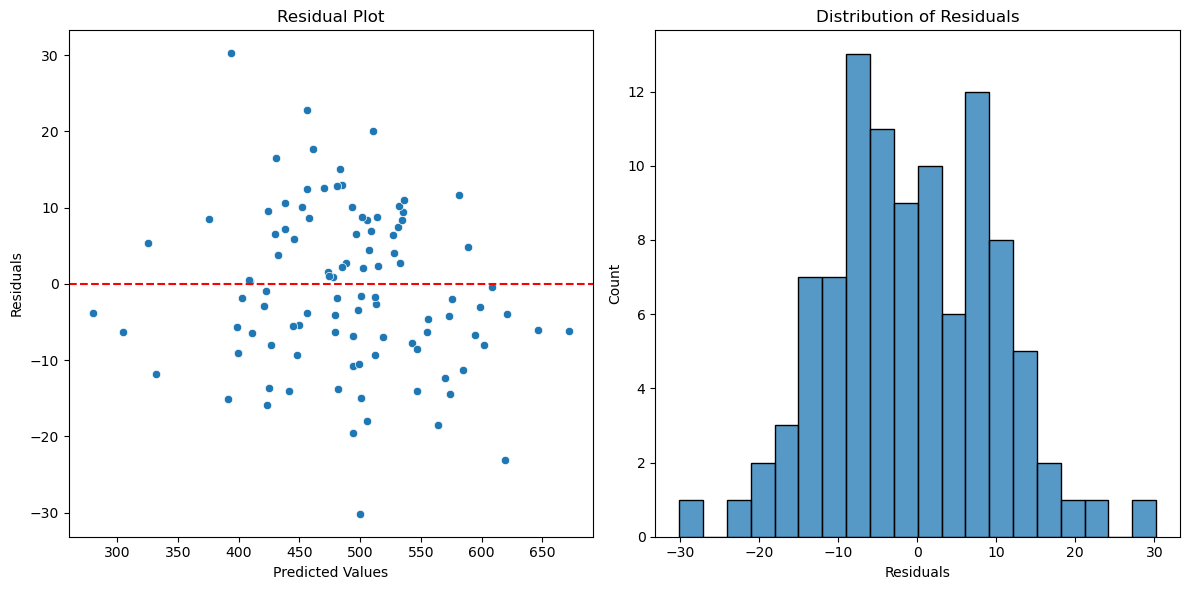

In [91]:
residuals = y_test - predictions

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot(x=predictions, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residual Plot")

sns.histplot(residuals, bins=20, ax=ax2)
ax2.set_xlabel("Residuals")
ax2.set_title("Distribution of Residuals")

plt.tight_layout()
plt.show()

## Model Evaluation

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# საზომების ბეჭდვა
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Determination coefficient (R²): {r2}")

Mean Absolute Error (MAE): 8.558441885315233
Mean Squared Error (MSE): 109.86374118393988
Root Mean Square Error (RMSE): 10.48159058463647
Determination coefficient (R²): 0.9778130629184127
